# 2. Simple linear regression analysis

Understanding simple linear regression analysis is simple. It's just about finding a linear relation between two variables (i.e. finding y=ax+b)

The code to do a simple linear regression analysis is:

```Python
from statsmodels.regression.linear_model import OLS
import statsmodels.api as sm

x_vals = df['x-value'].values
y_vals = df['y-value']

reg_model = OLS(y_vals, sm.add_constant(x_vals)).fit()
display(reg_model.summary())
```

Let's go back to the previous NHANES example:

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
df = pd.read_csv('Data/NHANES.csv')
df = df[['Gender', 'Height', 'Weight', 'Age']]
df = df.dropna()

Notice that I dropped na here. That is important in regression analysis.

In [14]:
adult = df['Age'] >= 20
child = df['Age'] < 20

# Remember that == means a condition statement to find if two elements are the same
male = df['Gender'] == 'male'
female = df['Gender'] == 'female'

# We will create two separate dataframes for male and female

male_df = df[adult & male]
female_df = df[adult & female]

In [20]:
from statsmodels.regression.linear_model import OLS
import statsmodels.api as sm

x_vals = male_df['Weight'].values
y_vals = male_df['Height']

reg_model = OLS(y_vals, sm.add_constant(x_vals)).fit()
display(reg_model.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Height   R-squared:                       0.164
Model:                            OLS   Adj. R-squared:                  0.164
Method:                 Least Squares   F-statistic:                     690.3
Date:                Thu, 03 Dec 2020   Prob (F-statistic):          4.53e-139
Time:                        05:29:09   Log-Likelihood:                -11752.
No. Observations:                3517   AIC:                         2.351e+04
Df Residuals:                    3515   BIC:                         2.352e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        162.0644      0.535    303.191      0.000     161.016     163.112
x1             0.1537      0.006     26.274      0.000       0.142       0.165
==============================================================================
Omnibus:                        3.693   Durbin-Watson:                   1.307
Prob(Omnibus):                  0.158   Jarque-Bera (JB):                3.690
Skew:                           0.058   Prob(JB):                        0.158
Kurtosis:                       3.108   Cond. No.                         423.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

What do I have to examine?

1. As a first step, look at Prob(F-statistic). If this is greater than 0.05, don't report the regression line. If it's less than 0.05, you can report the regression line, saying that a "statistically significant regression line was obtained". (you can rephrase this).
2. Look at the bold coef at the second table. const refers to b in y=ax+b and x1 refers to a in y=ax+b. Here, the regression line is: `Height = Weight * 0.154 + 162.064`
3. Look at P>|t| in the second table. This represents the p-value of the coefficients. If it's greater than 0.05, it's better not to include that coefficient in your regression analysis
4. [0.025 0.975] represents the 95% confidence interval of the coefficient. It might be better for you to report 95% CI of the slope.

What does regression analysis mean?

Here, we got:

`Height = Weight * 0.154 + 162.064`

Let's plug in weight = 60kg in this equation. Then we get that the height is:

In [6]:
60 * 0.154 + 162.064

171.304

This does not mean that everyone with weight = 60kg will have height = 171.3cm. It means that if I take the average height of all people with weight = 60kg, I would expect that it will be 171.3cm.

Next, let's graphically represent this result. Before running the scatter plot code, run this code to get the regression coefficients:

```Python
b0 = reg_model.params[0]
b1 = reg_model.params[1]
x_plot = np.linspace(np.min(df['x-value']), np.max(df['x-value']), 100) 
```
Then, add this line in the scatter plot code:
```Python
axs.plot(x_plot, x_plot*b1 + b0, color='red')
```

In [7]:
b0 = reg_model.params[0]
b1 = reg_model.params[1]
x_plot = np.linspace(np.min(male_df['Weight']), np.max(male_df['Weight']), 100)

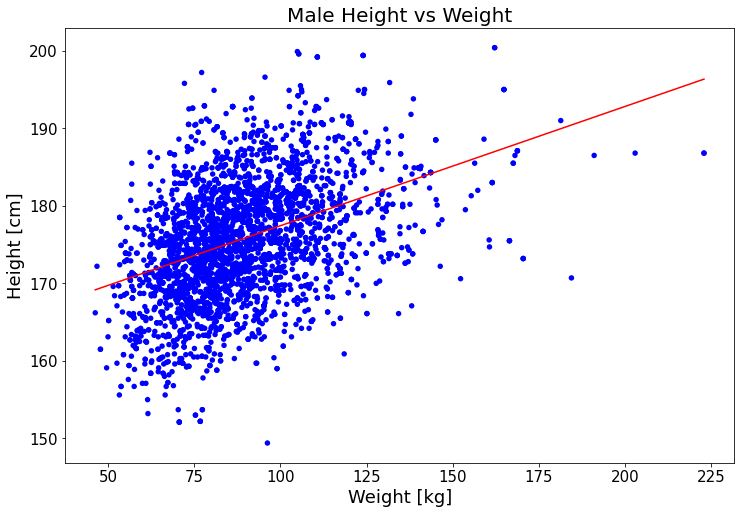

In [8]:
fig, axs = plt.subplots(figsize=(12,8))
axs.scatter(male_df['Weight'], male_df['Height'], c='blue', edgecolors='none', s=30)
axs.plot(x_plot, x_plot*b1 + b0, color='red')
plt.title("Male Height vs Weight", fontsize=20)
axs.set_xlabel("Weight [kg]", fontsize=18)
axs.set_ylabel("Height [cm]", fontsize=18)
axs.tick_params(labelsize=15)
plt.show()

Let's also add text to show the regression equation:

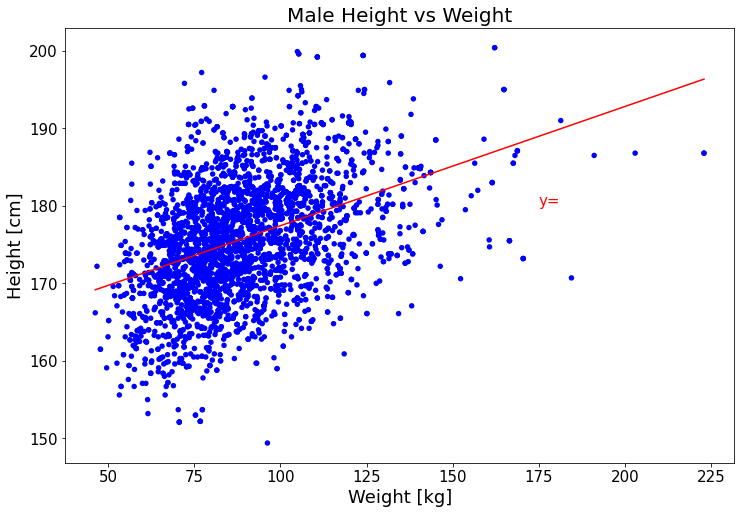

In [11]:
fig, axs = plt.subplots(figsize=(12,8))
axs.scatter(male_df['Weight'], male_df['Height'], c='blue', edgecolors='none', s=30)
axs.plot(x_plot, x_plot*b1 + b0, color='red')
plt.title("Male Height vs Weight", fontsize=20)
axs.set_xlabel("Weight [kg]", fontsize=18)
axs.set_ylabel("Height [cm]", fontsize=18)
axs.tick_params(labelsize=15)
plt.text(175, 180, "y=", fontsize=15, color='red')
plt.show()

We can also plot two regression lines representing two groups: